In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, LineString, Polygon
from shapely import wkt

In [2]:
streetmap = gpd.read_file('county_boundary/county_boundary.shp')
df = pd.read_csv('crime.csv')

In [3]:
df = df.groupby(['GEO_LON','GEO_LAT'])['INCIDENT_ID'].count().sort_values(ascending=False)[:2].reset_index()

In [4]:
geometry = [Point(xy) for xy in zip(df['GEO_LON'], df['GEO_LAT'])]

In [5]:
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [6]:
streetmap = gpd.read_file('county_boundary/county_boundary.shp')

In [7]:
geo_df = geo_df.append(pd.DataFrame({'GEO_LON': [None], 'GEO_LAT': [None], 'INCIDENT_ID': None, 
              'geometry': [LineString([geo_df['geometry'].iloc[0], geo_df['geometry'].iloc[1]])]}))

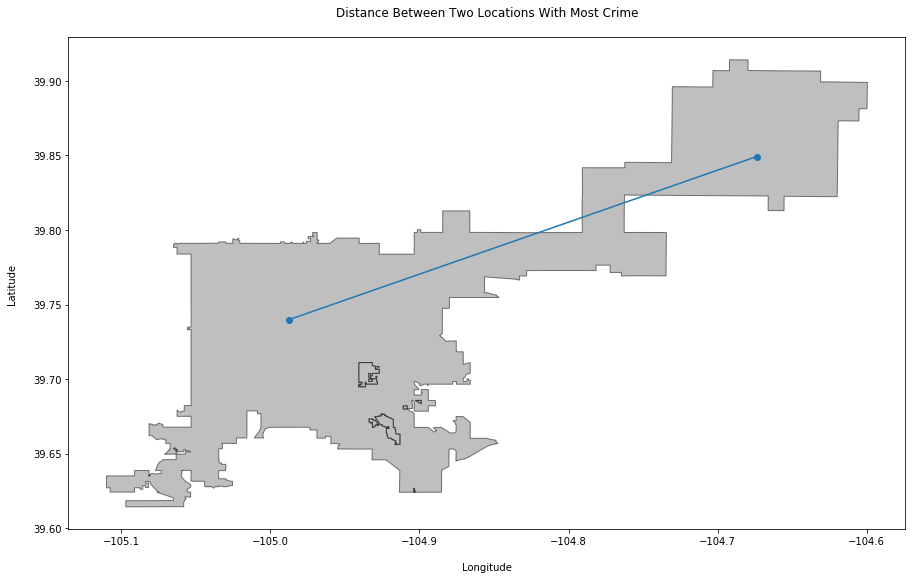

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Distance Between Two Locations With Most Crime\n')
plt.xlabel('\nLongitude')
plt.ylabel('Latitude\n')
streetmap.plot(ax=ax, alpha=0.5, color='grey', edgecolor='black')
geo_df.plot(ax=ax)
plt.savefig('ConnectionMap.png')